<a href="https://colab.research.google.com/github/MarthaHT/Redes-Neuronales/blob/main/Redes_neuronales_profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales profundas

> **Rodolfo Ferro** <br>
> Google Dev Expert en ML, 2020.
>
> _Redes:_
> - GitHub - [RodolfoFerro](https://github.com/RodolfoFerro)
> - Twitter - [@FerroRodolfo](https://twitter.com/FerroRodolfo)
> - Instagram - [@rodo_ferro](https://instagram.com/rodo_ferro)

## Contenidos

#### **Sección IV**
1. **Código:** El dataset de modas
2. **Código:** Preparación de datos
3. **Código:** Creación del modelo
4. **Código:** Entrenamiento del modelo
5. **Código:** Evaluación del modelo
6. **Código:** Predicción


## **Sección IV**

### El dataset de modas

Comencemos importando TensorFlow.

In [34]:
import tensorflow as tf
print(tf.__version__)

2.5.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [36]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 9
Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   1   0   0   2   0   0   0   0   0   2   0   0  14 199  87   0]
 [  0   0   0   0   0   0   0   0   1   3   0   0   0   0   0  

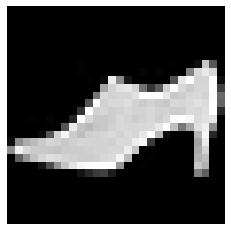

In [37]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 360

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [38]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 0
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.47058824 0.21176471 0.         0.         0.         0.         0.05098039
  0.48627451 0.         0.         0.         0.         0.00784314 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.25098039 0.67843137 0.81176471 0.85490196 0.80784314 0.90980392 0.72156863 0.65882353 0.79215686 0.80392157
  0.85490196 0.79215686 0.49411765 0.04705882 0.         0.         0.00392157 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.21960784 0.78039216 0.8745098  0.87058824 0.81176471 0.80392157 0.82745098 0.8745098  0.89019608 0.90588235 0.90196078 0.83921569
  0.79607843 0.81960784 0.8627451  0.83529412 0.64313725 0.         0.         0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.       

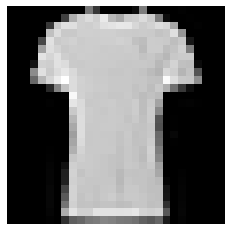

In [39]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

In [40]:
training_images[0].shape

(28, 28)

### Creación del modelo



In [41]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(), 
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(64, activation=tf.nn.relu),
            tf.keras.layers.Dense(32, activation=tf.nn.relu),
            tf.keras.layers.Dense(16, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        ])

### Entrenamiento del modelo

In [42]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
model.fit(training_images, training_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5463 - accuracy: 0.8007
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3830 - accuracy: 0.8598
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.8732
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3196 - accuracy: 0.8817
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8880
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.8937
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2713 - accuracy: 0.8984
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2602 - accuracy: 0.9024
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2524 - accuracy: 0.9061
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

### Evaluación del modelo

In [44]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8925


[0.3587801158428192, 0.8924999833106995]

### Predicción


Label: 3
Prediction: 3


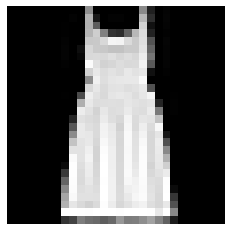

In [93]:
import random
test_index =random.randint(0, 10000-1)

plt.imshow(test_images[test_index], cmap='gray')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image=np.reshape(test_images[test_index],(1,784))
prediction = model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))